In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Our model: paper 1806.06184

In [2]:
def set_model(steps, K):
    """
    steps: how many we want consider.
    K: constant.
    return [phi_list, theta_list]
    """
    # randomised the inital condition
    phi0 = np.random.uniform(-1, 1) * np.pi
    theta0 = np.random.random(1) * np.pi
    # go to the cartesian coordinates
    x = np.sin(theta0) * np.cos(phi0)
    y = np.sin(theta0) * np.sin(phi0)
    z = np.cos(theta0)
    
    # list containg all data what we need
    phi_list = [phi0]
    theta_list = [theta0]

    
    for i in range(1, steps):
        # equation (13) in paper         
        x = z * np.cos(K * x) + y * np.sin(K * x)
        y = y * np.cos(K * x) - z * np.sin(K * x)
        z = -x
        
        # go to the spherical coordinates
#         phi = np.arctan2(y,x)
        phi = np.arctan(y/x)
        theta = np.arccos(z)
        # appending
        phi_list.append(phi)
        theta_list.append(theta)
    
    return [phi_list, theta_list]

# Plotting

C:\Users\Krzysztof\AppData\Local\Temp\ipykernel_20140\356624361.py:29: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(z)
C:\Users\Krzysztof\AppData\Local\Temp\ipykernel_20140\356624361.py:28: RuntimeWarning: overflow encountered in true_divide
  phi = np.arctan(y/x)
C:\Users\Krzysztof\AppData\Local\Temp\ipykernel_20140\356624361.py:28: RuntimeWarning: divide by zero encountered in true_divide
  phi = np.arctan(y/x)


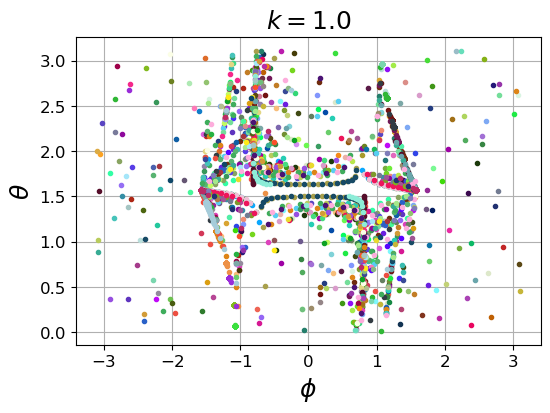

In [6]:
# Plotting
fig, ax = plt.subplots(figsize=(6.0, 4.0))

for i in range(0,200):
    # sets parameters
    steps = 900
    K = 1.0
    # get one path
    data_plots = set_model(steps, K)
    
    r, g, b = np.random.random(3)
    ax.plot(data_plots[0], data_plots[1], '.', color=(r,g,b))
#     ax.plot(data_plots[0], data_plots[1], color='blue', alpha=0.1)

# describing
plt.ylabel(r"$\theta$", fontsize=18)
plt.xlabel(r"$\phi$", fontsize=18)
plt.title(r"$k = 1.0$", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.grid(True)
plt.show()

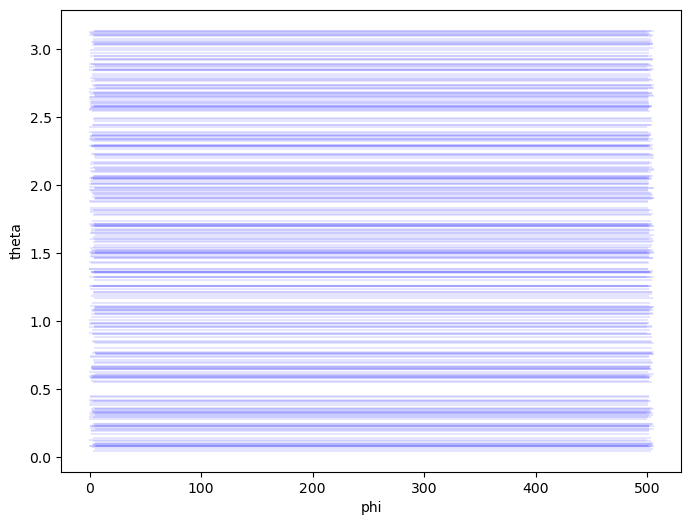

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system
def f(x, y, z, K):
    x_new = z * np.cos(K * x) + y * np.sin(K * x)
    y_new = y * np.cos(K * x) - z * np.sin(K * x)
    z_new = -x
    return x_new, y_new, z_new

# Set the number of initial conditions and kicks
num_init_conditions = 300
num_kicks = 500

# Generate the initial conditions
phi_0 = np.random.uniform(0, 2*np.pi, size=num_init_conditions)
theta_0 = np.random.uniform(0, np.pi, size=num_init_conditions)

# Initialize arrays to store the evolution of the system over time
phi = np.zeros((num_init_conditions, num_kicks))
theta = np.zeros((num_init_conditions, num_kicks))
x = np.zeros((num_init_conditions, num_kicks))
y = np.zeros((num_init_conditions, num_kicks))
z = np.zeros((num_init_conditions, num_kicks))

# Perform the iterations for each initial condition
for i in range(num_init_conditions):
    # Set the initial values
    phi[i, 0] = phi_0[i]
    theta[i, 0] = theta_0[i]
    x[i, 0], y[i, 0], z[i, 0] = f(phi_0[i], np.sin(theta_0[i]), np.cos(theta_0[i]), K=1)
    
    # Iterate over the remaining steps
    for j in range(1, num_kicks):
        phi[i, j] = (phi[i, j-1] + 1)
        theta[i, j] = theta[i, j-1]
        x[i, j], y[i, j], z[i, j] = f(phi[i, j], y[i, j-1], z[i, j-1], K=1)

# Plot the evolution of the system for each initial condition
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(num_init_conditions):
    ax.plot(phi[i], theta[i], color='blue', alpha=0.1)
ax.set_xlabel('phi')
ax.set_ylabel('theta')
plt.show()


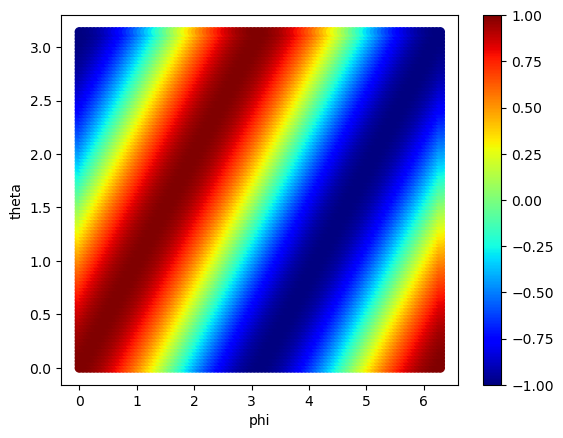

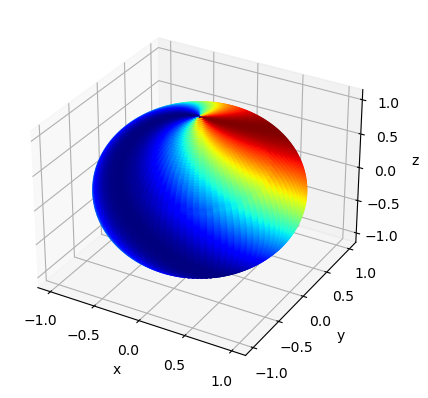

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system
def f(x, y, z, K):
    x_new = z * np.cos(K * x) + y * np.sin(K * x)
    y_new = y * np.cos(K * x) - z * np.sin(K * x)
    z_new = -x
    return x_new, y_new, z_new

# Choose a range of values for phi and theta
phi_range = np.linspace(0, 2*np.pi, 100)
theta_range = np.linspace(0, np.pi, 100)

# Generate a grid of phi and theta values
phi, theta = np.meshgrid(phi_range, theta_range)

# Calculate the values of x, y, and z for each phi and theta value
x, y, z = f(phi, np.sin(theta), np.cos(theta), K=1)

# Calculate the coordinates of each point in 3D space
r = 1
x_3d = r * np.sin(theta) * np.cos(phi)
y_3d = r * np.sin(theta) * np.sin(phi)
z_3d = r * np.cos(theta)

# Plot the points in 2D
plt.scatter(phi, theta, c=x, cmap='jet')
plt.xlabel('phi')
plt.ylabel('theta')
plt.colorbar()
plt.show()

# Alternatively, plot the points in 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_3d, y_3d, z_3d, c=x, cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()


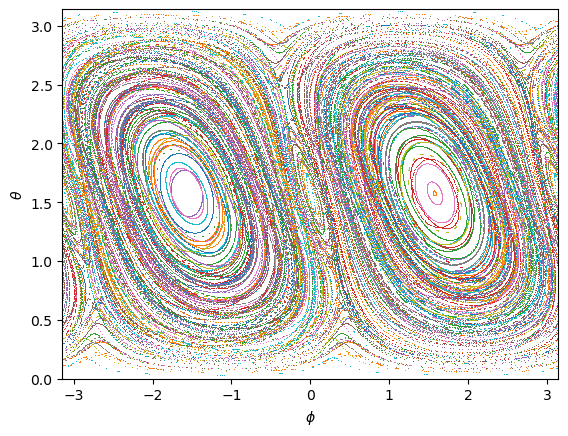

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system
def f(x, y, z, K):
    x_new = z * np.cos(K * x) + y * np.sin(K * x)
    y_new = y * np.cos(K * x) - z * np.sin(K * x)
    z_new = -x
    return x_new, y_new, z_new

# Set the number of initial conditions and kicks
n_init = 300
n_kicks = 500

# Generate a set of n_init random initial conditions
x_init = np.random.uniform(-1, 1, size=n_init)
y_init = np.random.uniform(-1, 1, size=n_init)
z_init = np.random.uniform(-1, 1, size=n_init)

# Initialize arrays to store the values of theta and phi at each iteration for each initial condition
theta = np.zeros((n_kicks, n_init))
phi = np.zeros((n_kicks, n_init))

# Apply the system for n_kicks iterations for each initial condition and store the values of theta and phi
for i in range(n_init):
    x = x_init[i]
    y = y_init[i]
    z = z_init[i]
    for j in range(n_kicks):
        r = np.sqrt(x**2 + y**2 + z**2)
        phi[j,i] = np.arctan2(y, x)
        theta[j,i] = np.arccos(z/r)
        x, y, z = f(x, y, z, K=1)

# Plot the values of theta and phi in a phase space plot
fig, ax = plt.subplots()
for i in range(n_init):
#     ax.plot(phi[:,i], theta[:,i], color='blue',alpha=0.1)
#     ax.plot(phi[:,i], theta[:,i], linewidth=0.01)
    ax.plot(phi[:,i], theta[:,i], ",")

ax.set_xlabel(r'$\phi$')
ax.set_ylabel(r'$\theta$')
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(0, np.pi)
plt.show()